<a href="https://colab.research.google.com/github/HP-002/salary_estimator/blob/main/salary_estimator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data

B. Becker and R. Kohavi. "Adult," UCI Machine Learning Repository, 1996. [Online]. Available: https://doi.org/10.24432/C5XW20.

### Read Train Data

In [95]:
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
train = pd.read_csv("adult.data")
train.columns = columns
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Training Data

Machine Learning Models work best with numbers. Therefore, we will map the data values to numbers. We will also fill missing values with 0.

In [96]:
print("age :", train['age'].unique())
print("workclass :", train['workclass'].unique())
print("fnlwgt :", train['fnlwgt'].unique())
print("education :", train['education'].unique())
print("education-num :", train['education-num'].unique())
print("marital-status :", train['marital-status'].unique())
print("occupation :", train['occupation'].unique())
print("relationship :", train['relationship'].unique())
print("race :", train['race'].unique())
print("sex :", train['sex'].unique())
print("capital-gain :", train['capital-gain'].unique())
print("capital-loss :", train['capital-loss'].unique())
print("hours-per-week :", train['hours-per-week'].unique())
print("native-country :", train['native-country'].unique())
print("income :", train['income'].unique())

age : [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt : [ 83311 215646 234721 ...  34066  84661 257302]
education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
education-num : [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
marital-status : [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation : [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishin

In [97]:
# Mappings

workclass_mapping = {' Self-emp-not-inc': 1, ' Private': 2, ' State-gov': 3, ' Federal-gov': 4, ' Local-gov': 5, ' Self-emp-inc': 6, ' Without-pay': 7, ' Never-worked': 8}
education_mapping = {' Bachelors': 1, ' HS-grad': 2, ' 11th': 3, ' Masters': 4, ' 9th': 5, ' Some-college': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' 7th-8th': 9, ' Doctorate': 10, ' Prof-school': 11, ' 5th-6th': 12, ' 10th': 13, ' 1st-4th': 14, ' Preschool': 15, ' 12th': 16}
marital_status_mapping = {' Married-civ-spouse': 1, ' Divorced': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Married-AF-spouse': 6, ' Widowed': 7}
occupation_mapping = {' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3, ' Other-service': 4, ' Adm-clerical': 5, ' Sales': 6, ' Craft-repair': 7, ' Transport-moving': 8, ' Farming-fishing': 9, ' Machine-op-inspct': 10, ' Tech-support': 11, ' Protective-serv': 12, ' Armed-Forces': 13, ' Priv-house-serv': 14}
relationship_mapping = {' Husband': 1, ' Not-in-family': 2, ' Wife': 3, ' Own-child': 4, ' Unmarried': 5, ' Other-relative': 6}
race_mapping = {' White': 1, ' Black': 2, ' Asian-Pac-Islander': 3, ' Amer-Indian-Eskimo': 4, ' Other': 5}
sex_mapping = {' Male': 1, ' Female': 2}
native_country_mapping = {' United-States': 1, ' Cuba': 2, ' Jamaica': 3, ' India': 4, ' Mexico': 5, ' South': 6, ' Puerto-Rico': 7, ' Honduras': 8, ' England': 9, ' Canada': 10, ' Germany': 11, ' Iran': 12, ' Philippines': 13, ' Italy': 14, ' Poland': 15, ' Columbia': 16, ' Cambodia': 17, ' Thailand': 18, ' Ecuador': 19, ' Laos': 20, ' Taiwan': 21, ' Haiti': 22, ' Portugal': 23, ' Dominican-Republic': 24, ' El-Salvador': 25, ' France': 26, ' Guatemala': 27, ' China': 28, ' Japan': 29, ' Yugoslavia': 30, ' Peru': 31, ' Outlying-US(Guam-USVI-etc)': 32, ' Scotland': 33, ' Trinadad&Tobago': 34, ' Greece': 35, ' Nicaragua': 36, ' Vietnam': 37, ' Hong': 38, ' Ireland': 39, ' Hungary': 40, ' Holand-Netherlands': 41}
income_mapping = {' <=50K': 0, ' >50K': 1}

In [98]:
train['age'] = train['age'].fillna(0).astype(int)
train['workclass'] = train['workclass'].map(workclass_mapping).fillna(0).astype(int)
train['fnlwgt'] = train['fnlwgt'].fillna(0).astype(int)
train['education'] = train['education'].map(education_mapping).fillna(0).astype(int)
train['education-num'] = train['education-num'].fillna(0).astype(int)
train['marital-status'] = train['marital-status'].map(marital_status_mapping).fillna(0).astype(int)
train['occupation'] = train['occupation'].map(occupation_mapping).fillna(0).astype(int)
train['relationship'] = train['relationship'].map(relationship_mapping).fillna(0).astype(int)
train['race'] = train['race'].map(race_mapping).fillna(0).astype(int)
train['sex'] = train['sex'].map(sex_mapping).fillna(0).astype(int)
train['capital-gain'] = train['capital-gain'].fillna(0).astype(int)
train['capital-loss'] = train['capital-loss'].fillna(0).astype(int)
train['hours-per-week'] = train['hours-per-week'].fillna(0).astype(int)
train['native-country'] = train['native-country'].map(native_country_mapping).fillna(0).astype(int)
train['income'] = train['income'].map(income_mapping).fillna(0).astype(int)

In [99]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,50,1,83311,1,13,1,1,1,1,1,0,0,13,1,0
1,38,2,215646,2,9,2,2,2,1,1,0,0,40,1,0
2,53,2,234721,3,7,1,2,1,2,1,0,0,40,1,0
3,28,2,338409,1,13,1,3,3,2,2,0,0,40,2,0
4,37,2,284582,4,14,1,1,3,1,2,0,0,40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,1,11,3,1,2,0,0,38,1,0
32556,40,2,154374,2,9,1,10,1,1,1,0,0,40,1,1
32557,58,2,151910,2,9,7,5,5,1,2,0,0,40,1,0
32558,22,2,201490,2,9,4,5,4,1,1,0,0,20,1,0


In [100]:
x_train = train.drop('income', axis=1)
y_train = train['income']

sc = StandardScaler()
x_train = sc.fit_transform(x_train)

### Testing Data

Repeat the process for test data.**bold text**

In [101]:
test = pd.read_csv("adult.test", skiprows=1)
test.columns = columns
test['income'] = test['income'].str.rstrip('.')
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16276,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16277,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16278,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [102]:
print("age :", test['age'].unique())
print("workclass :", test['workclass'].unique())
print("fnlwgt :", test['fnlwgt'].unique())
print("education :", test['education'].unique())
print("education-num :", test['education-num'].unique())
print("marital-status :", test['marital-status'].unique())
print("occupation :", test['occupation'].unique())
print("relationship :", test['relationship'].unique())
print("race :", test['race'].unique())
print("sex :", test['sex'].unique())
print("capital-gain :", test['capital-gain'].unique())
print("capital-loss :", test['capital-loss'].unique())
print("hours-per-week :", test['hours-per-week'].unique())
print("native-country :", test['native-country'].unique())
print("income :", test['income'].unique())

age : [38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 25 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87]
workclass : [' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
fnlwgt : [ 89814 336951 160323 ... 349230 321403  83891]
education : [' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 11th' ' 5th-6th'
 ' Assoc-voc' ' 9th' ' 12th' ' 1st-4th' ' Preschool']
education-num : [ 9 12 10  6 15  4 13 14 16  7  3 11  5  8  2  1]
marital-status : [' Married-civ-spouse' ' Never-married' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
occupation : [' Farming-fishing' ' Protective-serv' ' Machine-op-inspct' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' 

In [103]:
test['age'] = test['age'].fillna(0).astype(int)
test['workclass'] = test['workclass'].map(workclass_mapping).fillna(0).astype(int)
test['fnlwgt'] = test['fnlwgt'].fillna(0).astype(int)
test['education'] = test['education'].map(education_mapping).fillna(0).astype(int)
test['education-num'] = test['education-num'].fillna(0).astype(int)
test['marital-status'] = test['marital-status'].map(marital_status_mapping).fillna(0).astype(int)
test['occupation'] = test['occupation'].map(occupation_mapping).fillna(0).astype(int)
test['relationship'] = test['relationship'].map(relationship_mapping).fillna(0).astype(int)
test['race'] = test['race'].map(race_mapping).fillna(0).astype(int)
test['sex'] = test['sex'].map(sex_mapping).fillna(0).astype(int)
test['capital-gain'] = test['capital-gain'].fillna(0).astype(int)
test['capital-loss'] = test['capital-loss'].fillna(0).astype(int)
test['hours-per-week'] = test['hours-per-week'].fillna(0).astype(int)
test['native-country'] = test['native-country'].map(native_country_mapping).fillna(0).astype(int)
test['income'] = test['income'].map(income_mapping).fillna(0).astype(int)

In [104]:
test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,38,2,89814,2,9,1,9,1,1,1,0,0,50,1,0
1,28,5,336951,7,12,1,12,1,1,1,0,0,40,1,1
2,44,2,160323,6,10,1,10,1,2,1,7688,0,40,1,1
3,18,0,103497,6,10,4,0,4,1,2,0,0,30,1,0
4,34,2,198693,13,6,4,4,2,1,1,0,0,30,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,39,2,215419,1,13,2,3,2,1,2,0,0,36,1,0
16276,64,0,321403,2,9,7,0,6,2,1,0,0,40,1,0
16277,38,2,374983,1,13,1,3,1,1,1,0,0,50,1,0
16278,44,2,83891,1,13,2,5,4,3,1,5455,0,40,1,0


In [105]:
x_test = test.drop('income', axis=1)
y_test = test['income']

sc = StandardScaler()
x_test = sc.fit_transform(x_test)

# Evaluating Models

In [106]:
def model_metrics(model, X_test, Y_test):
  if isinstance(model, tf.keras.Model):
    y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
  else:
    y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall = recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')

  print("--------------------------------------------------------------------")
  print("Classification Metrics for", model)
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
  print("--------------------------------------------------------------------")

  return accuracy, precision, recall, f1

# Machine Learning Models

## Linear Models

### Logistic Regression

In [107]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

lr_accuracy, lr_precision, lr_recall, lr_f1 = model_metrics(lr, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for LogisticRegression()
Accuracy: 0.841031941031941
Precision: 0.8322755314757752
Recall: 0.841031941031941
F1 Score: 0.8328613647338617
--------------------------------------------------------------------


### Stochastic Gradient Descent Classifier

In [108]:
sgdc = SGDClassifier()

sgdc.fit(x_train, y_train)

sgdc_accuracy, sgdc_precision, sgdc_recall, sgdc_f1 = model_metrics(sgdc, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for SGDClassifier()
Accuracy: 0.8331081081081081
Precision: 0.8264993556811655
Recall: 0.8331081081081081
F1 Score: 0.8287207357531909
--------------------------------------------------------------------


### Ridge Classifier

In [109]:
rc = RidgeClassifier()

rc.fit(x_train, y_train)

rc_accuracy, rc_precision, rc_recall, rc_f1 = model_metrics(rc, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for RidgeClassifier()
Accuracy: 0.8265356265356265
Precision: 0.8168477086501812
Recall: 0.8265356265356265
F1 Score: 0.8058607790014284
--------------------------------------------------------------------


## Tree Based Models

### Decision Tree

In [110]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

dt_accuracy, dt_precision, dt_recall, dt_f1 = model_metrics(dt, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for DecisionTreeClassifier()
Accuracy: 0.8094594594594594
Precision: 0.8112041228149266
Recall: 0.8094594594594594
F1 Score: 0.8102974765600566
--------------------------------------------------------------------


### Random Forest Classifier

In [111]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

rf_accuracy, rf_precision, rf_recall, rf_f1 = model_metrics(rf, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for RandomForestClassifier()
Accuracy: 0.8522113022113023
Precision: 0.845647239586262
Recall: 0.8522113022113023
F1 Score: 0.8468541139091623
--------------------------------------------------------------------


### XGBoost Classifier

In [112]:
xgb = XGBClassifier(learning_rate=0.1)

xgb.fit(x_train, y_train)

xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = model_metrics(xgb, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.842014742014742
Precision: 0.8355463423211809
Recall: 0.842014742014742
F1 Score: 0.8374626909403072
----------------------------------

### LightGBM Classifier

In [113]:
lgbm = LGBMClassifier(learning_rate=0.1)

lgbm.fit(x_train, y_train)

lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1 = model_metrics(lgbm, x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 7841, number of negative: 24719
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 713
[LightGBM] [Info] Number of data points in the train set: 32560, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240817 -> initscore=-1.148206
[LightGBM] [Info] Start training from score -1.148206
--------------------------------------------------------------------
Classification Metrics for LGBMClassifier()
Accuracy: 0.8710687960687961
Precision: 0.8663151111260037
Recall: 0.8710687960687961
F1 Score: 0.86700758171207
--------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## Distance-Based Model

### K-Nearest Neighbors (KNN)

In [114]:
# KNN with 3 neighbors

knn3 = KNeighborsClassifier(n_neighbors=3)

knn3.fit(x_train, y_train)

knn3_accuracy, knn3_precision, knn3_recall, knn3_f1 = model_metrics(knn3, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for KNeighborsClassifier(n_neighbors=3)
Accuracy: 0.8191031941031941
Precision: 0.8137739244290638
Recall: 0.8191031941031941
F1 Score: 0.8159622841028753
--------------------------------------------------------------------


In [35]:
# KNN with 5 neighbors

knn5 = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn5.fit(x_train, y_train)

knn5_accuracy, knn5_precision, knn5_recall, knn5_f1 = model_metrics(knn5, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for KNeighborsClassifier(weights='distance')
Accuracy: 0.8267199017199017
Precision: 0.8214774571040486
Recall: 0.8267199017199017
F1 Score: 0.8235666450181657
--------------------------------------------------------------------


### Radius Neighbors Classifier

In [36]:
rn = RadiusNeighborsClassifier(radius=2.0, outlier_label=0)

rn.fit(x_train, y_train)

rn_accuracy, rn_precision, rn_recall, rn_f1 = model_metrics(rn, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for RadiusNeighborsClassifier(outlier_label=0, radius=2.0)
Accuracy: 0.8264127764127764
Precision: 0.814541790351346
Recall: 0.8264127764127764
F1 Score: 0.8111167863659094
--------------------------------------------------------------------


## Support Vector Machines

### Linear SVM

In [37]:
lsvm = LinearSVC()

lsvm.fit(x_train, y_train)

lsvm_accuracy, lsvm_precision, lsvm_recall, lsvm_f1 = model_metrics(lsvm, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for LinearSVC()
Accuracy: 0.8404176904176904
Precision: 0.831197243212114
Recall: 0.8404176904176904
F1 Score: 0.8301228350258839
--------------------------------------------------------------------


### Kernel SVM


In [38]:
ksvm = SVC()

ksvm.fit(x_train, y_train)

ksvm_accuracy, ksvm_precision, ksvm_recall, ksvm_f1 = model_metrics(ksvm, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for SVC()
Accuracy: 0.8501842751842752
Precision: 0.8425347419385818
Recall: 0.8501842751842752
F1 Score: 0.8409518680266087
--------------------------------------------------------------------


## Bayesian Models

### Gaussian Naive Bayes

In [39]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

gnb_accuracy, gnb_precision, gnb_recall, gnb_f1 = model_metrics(gnb, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for GaussianNB()
Accuracy: 0.8181818181818182
Precision: 0.8043844952714603
Recall: 0.8181818181818182
F1 Score: 0.8033983810268457
--------------------------------------------------------------------


### Bernoulli Naive Bayes

In [40]:
bnb = BernoulliNB()

bnb.fit(x_train, y_train)

bnb_accuracy, bnb_precision, bnb_recall, bnb_f1 = model_metrics(bnb, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for BernoulliNB()
Accuracy: 0.8034398034398035
Precision: 0.807779663604415
Recall: 0.8034398034398035
F1 Score: 0.8054237718327223
--------------------------------------------------------------------


## Neural Networks

### Multi-layer Perceptron Classifier

In [41]:
mlp = MLPClassifier(hidden_layer_sizes=[100, 50, 10], max_iter=1000)

mlp.fit(x_train, y_train)

mlp_accuracy, mlp_precision, mlp_recall, mlp_f1 = model_metrics(mlp, x_test, y_test)

--------------------------------------------------------------------
Classification Metrics for MLPClassifier(hidden_layer_sizes=[100, 50, 10], max_iter=1000)
Accuracy: 0.8283783783783784
Precision: 0.8239074906981342
Recall: 0.8283783783783784
F1 Score: 0.8257612834266713
--------------------------------------------------------------------


### Deep Neural Networks

In [50]:
dnn_model = tf.keras.Sequential([
    layers.Dense(1000, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(500, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

dnn_model.compile(
    loss='binary_crossentropy',
    metrics=['accuracy']
)

dnn_model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

dnn_accuracy, dnn_precision, dnn_recall, dnn_f1 = model_metrics(dnn_model, x_test, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8344 - loss: 0.3580 - val_accuracy: 0.8431 - val_loss: 0.3297
Epoch 2/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8460 - loss: 0.3322 - val_accuracy: 0.8506 - val_loss: 0.3195
Epoch 3/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8551 - loss: 0.3210 - val_accuracy: 0.8460 - val_loss: 0.3262
Epoch 4/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8562 - loss: 0.3139 - val_accuracy: 0.8495 - val_loss: 0.3247
Epoch 5/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.8558 - loss: 0.3131 - val_accuracy: 0.8518 - val_loss: 0.3196
Epoch 6/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8564 - loss: 0.3116 - val_accuracy: 0.8510 - val_loss: 0.3205
Epoch 7/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.8531 - loss: 0.3197 - val_accuracy: 0.8541 - val_loss: 0.3196
Epoch 8/100
814/814 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8568 - loss: 0

# Model Analysis

### Helper Plot Functions

In [89]:
def plot_individual_metrics(model_name, accuracy, precision, recall, f1):
    metrics = [accuracy, precision, recall, f1]
    labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

    plt.figure(figsize=(3.5, 2.5))
    plt.rcParams.update({'font.size': 8})
    bars = plt.bar(labels, metrics, color=['#2196f3', '#f44336', '#4caf50', '#ff9800'], width=0.05)

    x = np.arange(len(labels))
    bar_width = 0.4

    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.4f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 4), textcoords="offset points",
                     ha='center', va='bottom')

    plt.xticks(ticks=x, labels=labels)
    plt.xlim(-0.5, len(labels) - 0.5)

    plt.ylim(0, 1.05)
    plt.title(model_name)
    plt.ylabel("Score")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [93]:
def plot_all_metrics(model_names, metrics_list):
    metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    num_models = len(model_names)
    num_metrics = len(metrics_labels)

    metrics_array = np.array(metrics_list).T

    x = np.arange(num_metrics)
    bar_width = 0.8 / num_models

    cmap = plt.get_cmap('tab20')
    colors = [cmap(i) for i in range(num_models)]

    plt.figure(figsize=(16, 8))

    for i in range(num_models):
        offset = (i - num_models / 2) * bar_width + bar_width / 2
        plt.bar(x + offset, metrics_array[:, i], width=bar_width, color=colors[i], label=model_names[i])

    plt.xticks(ticks=x, labels=metrics_labels, fontsize=8)
    plt.ylim(0, 1.05)
    plt.ylabel("Score", fontsize=8)
    plt.title("Performance Metrics Across Models", fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=7, title_fontsize=8)

    plt.tight_layout()
    plt.show()

### Plots

Individual plots of all the models' Accuracy, Precision, Recall, and F1 scores.

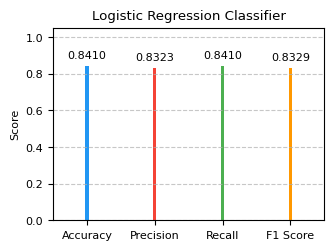

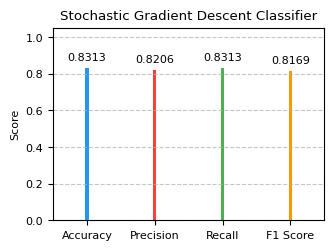

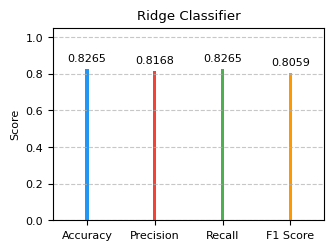

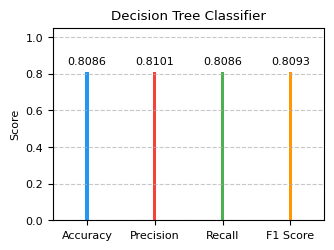

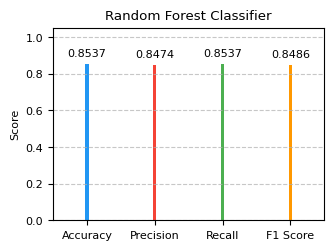

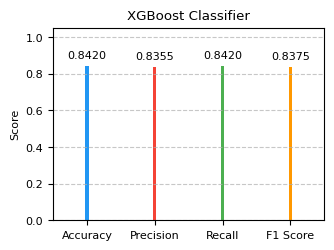

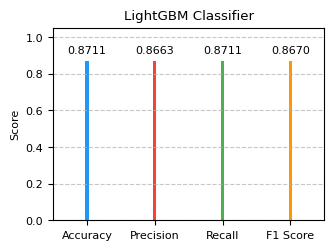

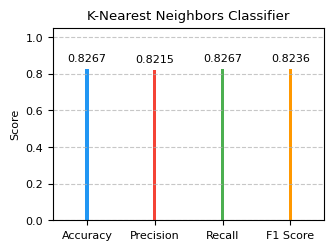

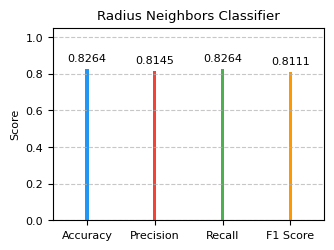

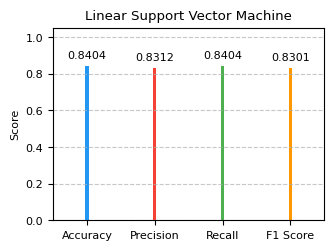

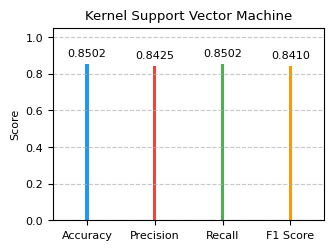

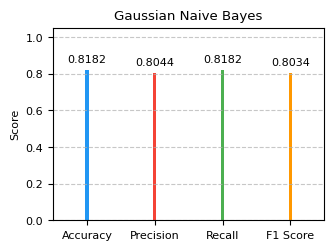

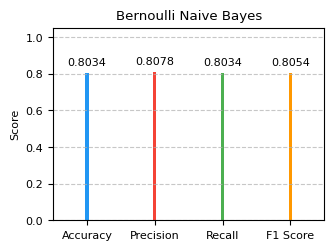

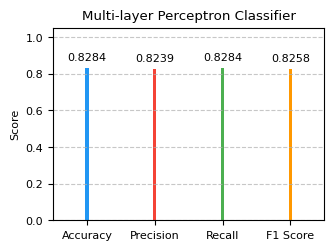

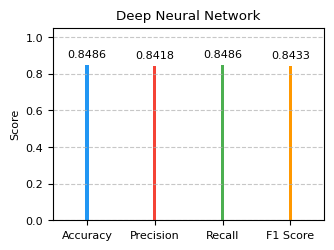

In [91]:
plot_individual_metrics("Logistic Regression Classifier", lr_accuracy, lr_precision, lr_recall, lr_f1)
plot_individual_metrics("Stochastic Gradient Descent Classifier", sgdc_accuracy, sgdc_precision, sgdc_recall, sgdc_f1)
plot_individual_metrics("Ridge Classifier", rc_accuracy, rc_precision, rc_recall, rc_f1)
plot_individual_metrics("Decision Tree Classifier", dt_accuracy, dt_precision, dt_recall, dt_f1)
plot_individual_metrics("Random Forest Classifier", rf_accuracy, rf_precision, rf_recall, rf_f1)
plot_individual_metrics("XGBoost Classifier", xgb_accuracy, xgb_precision, xgb_recall, xgb_f1)
plot_individual_metrics("LightGBM Classifier", lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1)
plot_individual_metrics("K-Nearest Neighbors Classifier", knn5_accuracy, knn5_precision, knn5_recall, knn5_f1)
plot_individual_metrics("Radius Neighbors Classifier", rn_accuracy, rn_precision, rn_recall, rn_f1)
plot_individual_metrics("Linear Support Vector Machine", lsvm_accuracy, lsvm_precision, lsvm_recall, lsvm_f1)
plot_individual_metrics("Kernel Support Vector Machine", ksvm_accuracy, ksvm_precision, ksvm_recall, ksvm_f1)
plot_individual_metrics("Gaussian Naive Bayes", gnb_accuracy, gnb_precision, gnb_recall, gnb_f1)
plot_individual_metrics("Bernoulli Naive Bayes", bnb_accuracy, bnb_precision, bnb_recall, bnb_f1)
plot_individual_metrics("Multi-layer Perceptron Classifier", mlp_accuracy, mlp_precision, mlp_recall, mlp_f1)
plot_individual_metrics("Deep Neural Network", dnn_accuracy, dnn_precision, dnn_recall, dnn_f1)

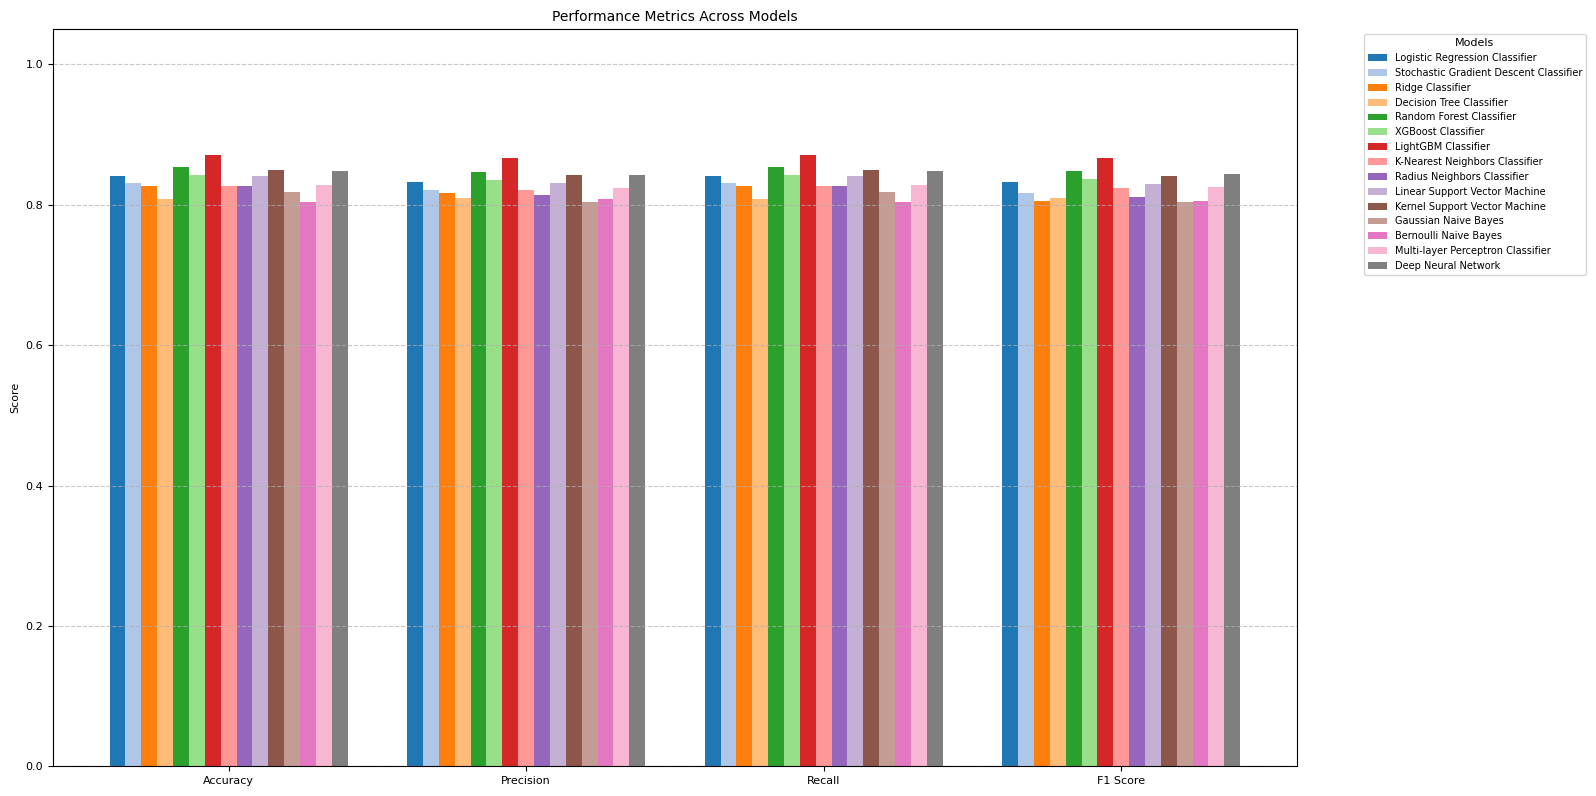

In [94]:
model_names = [
    "Logistic Regression Classifier", "Stochastic Gradient Descent Classifier",
    "Ridge Classifier", "Decision Tree Classifier", "Random Forest Classifier",
    "XGBoost Classifier", "LightGBM Classifier",
    "K-Nearest Neighbors Classifier", "Radius Neighbors Classifier",
    "Linear Support Vector Machine", "Kernel Support Vector Machine",
    "Gaussian Naive Bayes", "Bernoulli Naive Bayes",
    "Multi-layer Perceptron Classifier", "Deep Neural Network"
]

metrics_list = [
    (lr_accuracy, lr_precision, lr_recall, lr_f1),
    (sgdc_accuracy, sgdc_precision, sgdc_recall, sgdc_f1),
    (rc_accuracy, rc_precision, rc_recall, rc_f1),
    (dt_accuracy, dt_precision, dt_recall, dt_f1),
    (rf_accuracy, rf_precision, rf_recall, rf_f1),
    (xgb_accuracy, xgb_precision, xgb_recall, xgb_f1),
    (lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1),
    (knn5_accuracy, knn5_precision, knn5_recall, knn5_f1),
    (rn_accuracy, rn_precision, rn_recall, rn_f1),
    (lsvm_accuracy, lsvm_precision, lsvm_recall, lsvm_f1),
    (ksvm_accuracy, ksvm_precision, ksvm_recall, ksvm_f1),
    (gnb_accuracy, gnb_precision, gnb_recall, gnb_f1),
    (bnb_accuracy, bnb_precision, bnb_recall, bnb_f1),
    (mlp_accuracy, mlp_precision, mlp_recall, mlp_f1),
    (dnn_accuracy, dnn_precision, dnn_recall, dnn_f1),
]

plot_all_metrics(model_names, metrics_list)